In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# closing warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# importing and reading data
data = pd.read_csv("athlete_events.csv")
data.head(7)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
# More info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [6]:
# columns
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [10]:
# changing columns' names (if needed)
data.rename(columns={"ID":"id"},inplace=True)

In [11]:
data.head(2)

,id,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [13]:
# dropping unnecessary data (columns)
data.drop(["id","Games"],axis=1,inplace=True)
data.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [14]:
# filling NaN with (in Height and Weight using Event data)
unique_events = pd.unique(data.Event) 
print("Number of unique events: {}".format(len(unique_events)))
unique_events[:10]

Number of unique events: 765


array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay"], dtype=object)

In [21]:
# using for loop to calculate height and weight averages in each events and fill NaN with mean
copy_data = data.copy()
weight_height_list = ["Height","Weight"]

for e in unique_events:
    event_filter = copy_data.Event == e
    filtered_data = copy_data[event_filter]
    for s in weight_height_list:
        mean = np.round(np.mean(filtered_data[s]),2)
        
        if ~np.isnan(mean):
            filtered_data[s] = filtered_data[s].fillna(mean)
        else:
            all_data_mean = np.round(np.mean(data[s]),2)
            filtered_data[s] = filtered_data[s].fillna(all_data_mean)
    
    copy_data[event_filter] = filtered_data       
    
                                                       
data = copy_data.copy()
data.info()
            

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     261642 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [23]:
# filling NaN values in Age category
age_mean = np.round(np.mean(data.Age),2)
print("Age mean: {}".format(age_mean))
data["Age"]=data["Age"].fillna(age_mean)
data.info()

Age mean: 25.56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Name    271116 non-null  object 
 1   Sex     271116 non-null  object 
 2   Age     271116 non-null  float64
 3   Height  271116 non-null  float64
 4   Weight  271116 non-null  float64
 5   Team    271116 non-null  object 
 6   NOC     271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   39783 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 26.9+ MB


In [24]:
# Including players only with medal 
medall = data["Medal"]
pd.isnull(medall).sum()

231333

In [25]:
medal_filter = ~pd.isnull(medall)

In [27]:
data= data[medal_filter] # players only with medals
data.head(7)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze
42,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold
44,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39783 entries, 3 to 271103
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    39783 non-null  object 
 1   Sex     39783 non-null  object 
 2   Age     39783 non-null  float64
 3   Height  39783 non-null  float64
 4   Weight  39783 non-null  float64
 5   Team    39783 non-null  object 
 6   NOC     39783 non-null  object 
 7   Year    39783 non-null  int64  
 8   Season  39783 non-null  object 
 9   City    39783 non-null  object 
 10  Sport   39783 non-null  object 
 11  Event   39783 non-null  object 
 12  Medal   39783 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 4.2+ MB


In [29]:
# Save the clean data
data.to_csv("Olimpics_cleaned.csv",index=False)

In [30]:
# Histogram graphs function
def Histogram(var):
    plt.figure()
    plt.hist(data[var],bins=80,color="lime")
    plt.xlabel(var)
    plt.ylabel("Frequency")
    plt.title("Histogram plot of {}".format(var))
    plt.show()

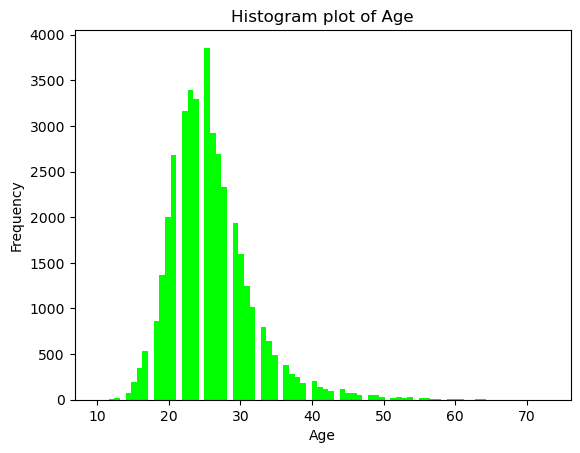

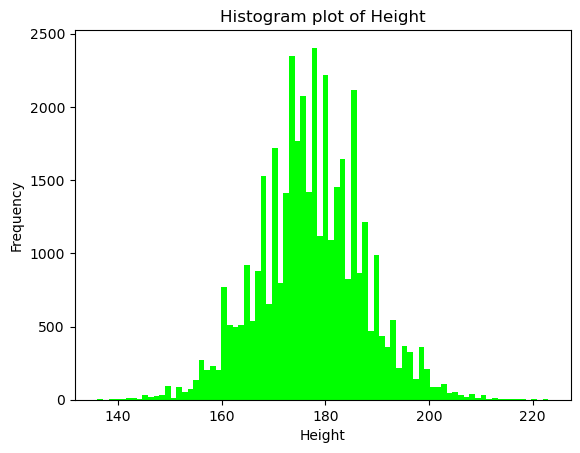

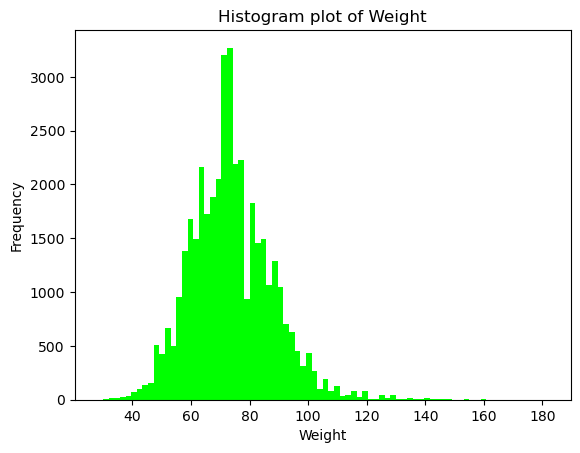

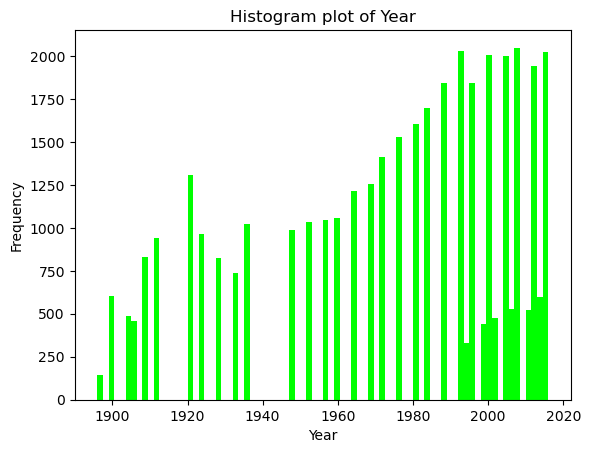

In [31]:
# Plot Histograms
nominal_vars = ["Age","Height","Weight","Year"]
for i in nominal_vars:
    Histogram(i)

In [32]:
data.describe()

,Age,Height,Weight,Year
count,39783.000000,39783.000000,39783.000000,39783.000000
mean,25.918456,177.336690,73.738320,1973.943845
std,5.859569,10.170124,13.979041,33.822857
min,10.000000,136.000000,28.000000,1896.000000
25%,22.000000,170.000000,64.000000,1952.000000
50%,25.000000,177.480000,73.000000,1984.000000
75%,29.000000,184.000000,82.000000,2002.000000
max,73.000000,223.000000,182.000000,2016.000000


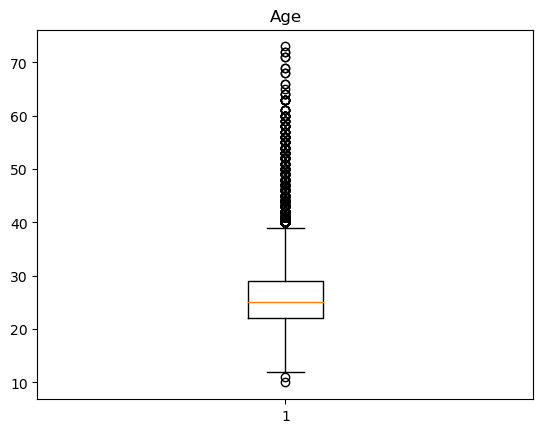

In [34]:
plt.boxplot(data.Age)
plt.title("Age")
plt.show()

In [37]:
# plotting Bar Graphs
def plotBar(var,n=5):
    dataf = data[var]
    data_counts = dataf.value_counts()
    data_counts = data_counts[:5]
    plt.figure()
    plt.bar(data_counts.index,data_counts, color="purple")
    plt.xticks(data_counts.index,data_counts.index.values)
    plt.xticks(rotation= 45)
    plt.ylabel("Frequency")
    plt.title("Bar plot of {}".format(var))
    plt.show()
    print("{}: \n {}".format(var,data_counts))
    

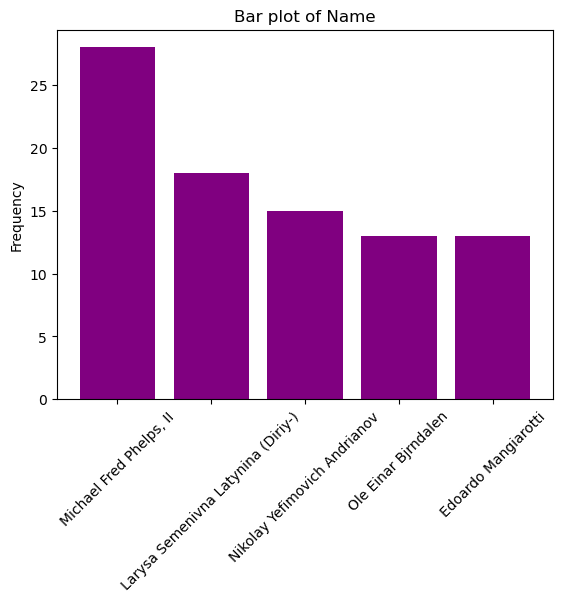

Name: 
 Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Ole Einar Bjrndalen                   13
Edoardo Mangiarotti                   13
Name: Name, dtype: int64


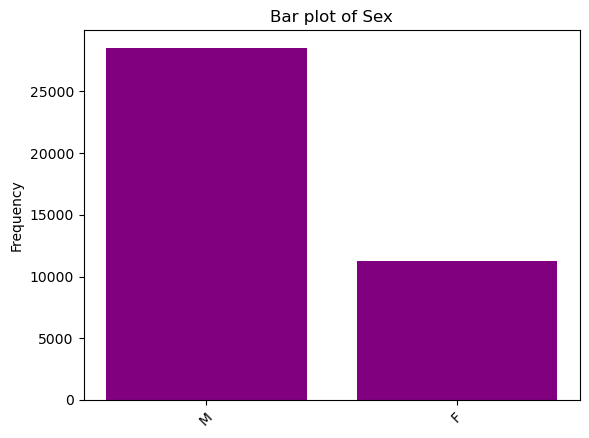

Sex: 
 M    28530
F    11253
Name: Sex, dtype: int64


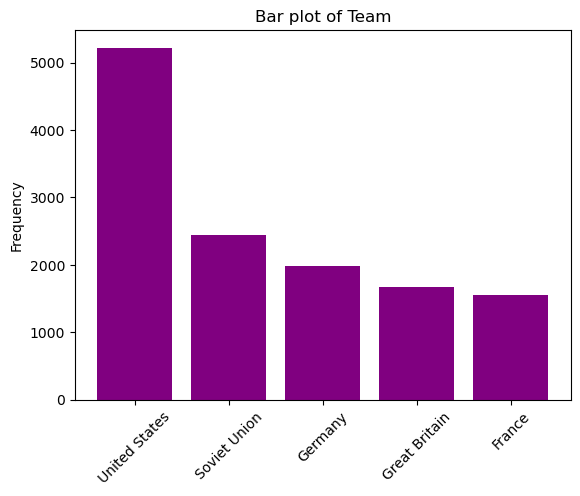

Team: 
 United States    5219
Soviet Union     2451
Germany          1984
Great Britain    1673
France           1550
Name: Team, dtype: int64


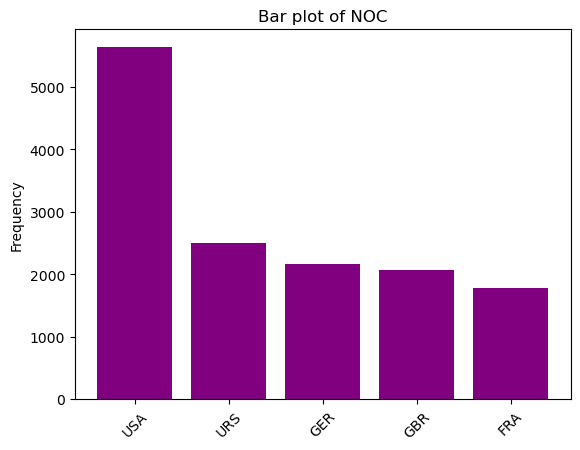

NOC: 
 USA    5637
URS    2503
GER    2165
GBR    2068
FRA    1777
Name: NOC, dtype: int64


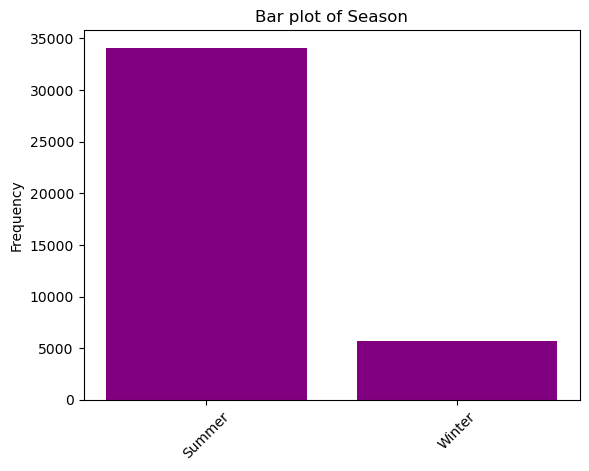

Season: 
 Summer    34088
Winter     5695
Name: Season, dtype: int64


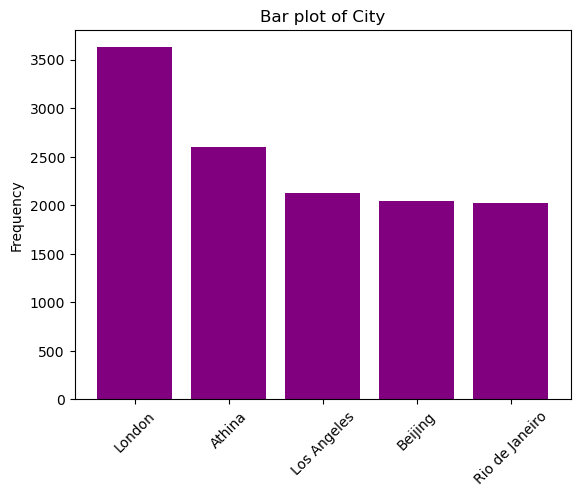

City: 
 London            3624
Athina            2602
Los Angeles       2123
Beijing           2048
Rio de Janeiro    2023
Name: City, dtype: int64


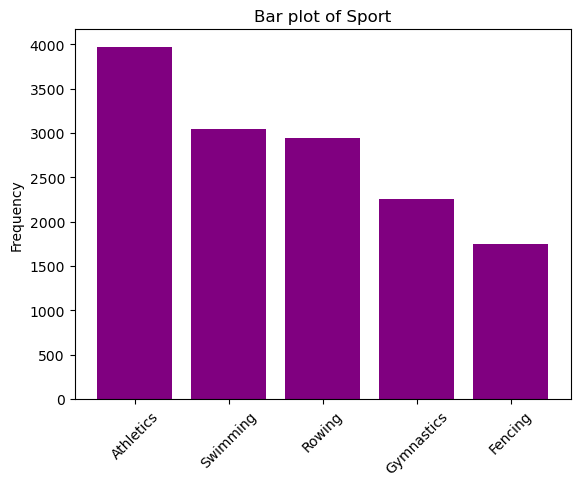

Sport: 
 Athletics     3969
Swimming      3048
Rowing        2945
Gymnastics    2256
Fencing       1743
Name: Sport, dtype: int64


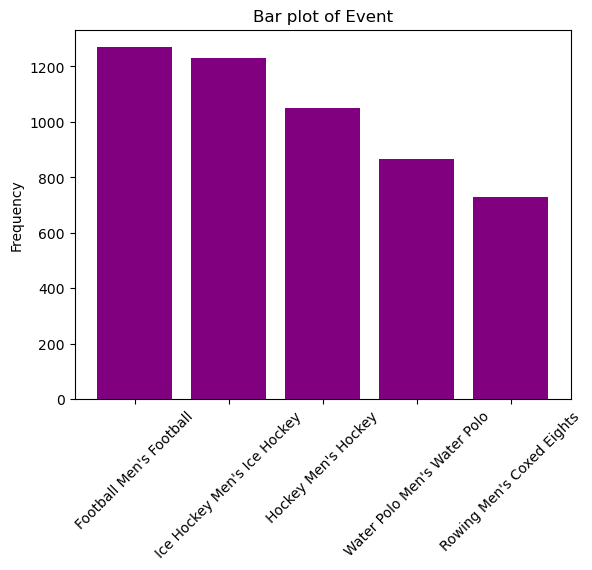

Event: 
 Football Men's Football        1269
Ice Hockey Men's Ice Hockey    1230
Hockey Men's Hockey            1050
Water Polo Men's Water Polo     866
Rowing Men's Coxed Eights       730
Name: Event, dtype: int64


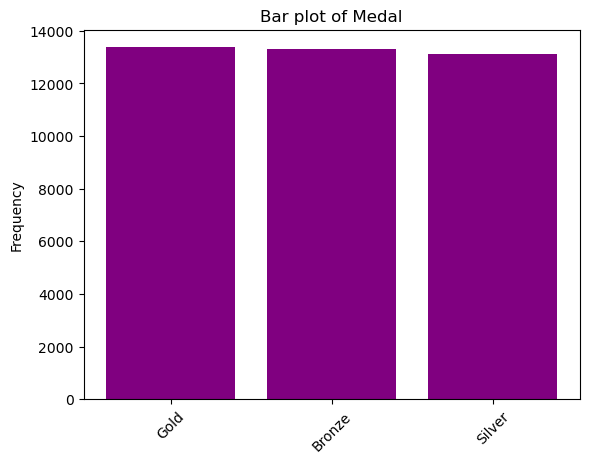

Medal: 
 Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64


In [39]:
Categorical_vars = ["Name","Sex","Team","NOC","Season","City","Sport","Event","Medal"]
for k in Categorical_vars:
    plotBar(k)

In [41]:
Male = data[data.Sex == "M"]
Male.head(4)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [42]:
Female = data[data.Sex == "F"]
Female.head(4)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
79,Ragnhild Margrethe Aamodt,F,27.0,163.00,68.88,Norway,NOR,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold
91,Willemien Aardenburg,F,22.0,166.13,60.53,Netherlands,NED,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
105,Ann Kristin Aarnes,F,23.0,182.00,64.00,Norway,NOR,1996,Summer,Atlanta,Football,Football Women's Football,Bronze
161,Patimat Abakarova,F,21.0,165.00,49.00,Azerbaijan,AZE,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Women's Flyweight,Bronze


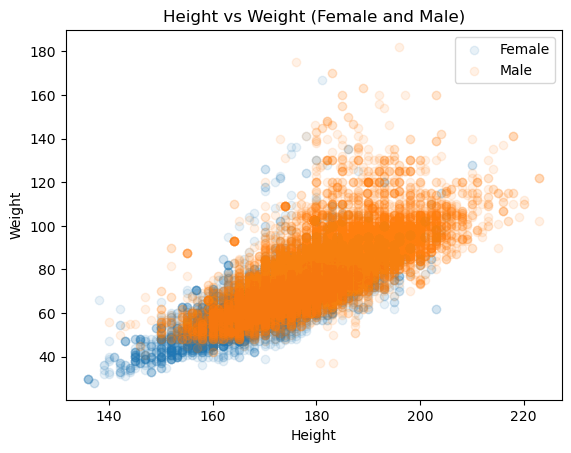

In [48]:
plt.figure()
plt.scatter(Female.Height, Female.Weight,alpha=0.1,label="Female")
plt.scatter(Male.Height, Male.Weight,alpha=0.1,label="Male")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight (Female and Male)")
plt.legend()
plt.show()

In [49]:
data.loc[:,["Age","Height","Weight"]].corr()

,Age,Height,Weight
Age,1.000000,0.061890,0.136349
Height,0.061890,1.000000,0.794368
Weight,0.136349,0.794368,1.000000


In [50]:
data_copy = data.copy()
data_copy = pd.get_dummies(data_copy,columns=["Medal"]) # VERY USEFUL!!
data_copy.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal_Bronze,Medal_Gold,Medal_Silver
3,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,0,1,0
37,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,1,0,0
38,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,1,0,0
40,Juhamatti Tapio Aaltonen,M,28.0,184.00,85.00,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,1,0,0
41,Paavo Johannes Aaltonen,M,28.0,175.00,64.00,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,1,0,0


In [53]:
data_copy.loc[:,["Age","Medal_Bronze","Medal_Gold","Medal_Silver"]].corr()

,Age,Medal_Bronze,Medal_Gold,Medal_Silver
Age,1.000000,-0.005584,-0.002576,0.008192
Medal_Bronze,-0.005584,1.000000,-0.504110,-0.496859
Medal_Gold,-0.002576,-0.504110,1.000000,-0.499022
Medal_Silver,0.008192,-0.496859,-0.499022,1.000000


In [54]:
data_copy[["Team","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby(["Team"],
    as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)[:10]

,Team,Medal_Bronze,Medal_Gold,Medal_Silver
462,United States,1233,2474,1512
403,Soviet Union,677,1058,716
165,Germany,678,679,627
215,Italy,484,535,508
171,Great Britain,572,519,582
149,France,577,455,518
420,Sweden,507,451,476
198,Hungary,365,432,330
67,Canada,408,422,413
117,East Germany,263,369,309


In [55]:
data_copy[["City","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby(["City"],
    as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)[:10]

,City,Medal_Bronze,Medal_Gold,Medal_Silver
17,London,1214,1215,1195
3,Athina,860,883,859
18,Los Angeles,706,726,691
6,Beijing,710,671,667
27,Rio de Janeiro,703,665,655
38,Sydney,680,663,661
4,Atlanta,629,608,605
5,Barcelona,604,559,549
33,Seoul,549,520,513
2,Antwerpen,367,493,448


In [56]:
data_copy[["Sex","Medal_Bronze","Medal_Gold","Medal_Silver"]].groupby(["Sex"],
    as_index=False).sum().sort_values(by="Medal_Gold",ascending=False)

,Sex,Medal_Bronze,Medal_Gold,Medal_Silver
1,M,9524,9625,9381
0,F,3771,3747,3735


In [59]:
data_pivot = data.pivot_table(index="Medal",columns="Sex",
                values=["Height","Weight","Age"],
                aggfunc={"Height":np.mean,"Weight":np.mean,
                         "Age":[min,max,np.std]})
data_pivot

Age                                            Height              \
         max         min             std                  mean               
Sex        F     M     F     M         F         M           F           M   
Medal                                                                        
Bronze  69.0  72.0  12.0  10.0  5.329229  5.870340  170.003227  180.045806   
Gold    63.0  64.0  13.0  13.0  5.219615  5.987807  170.448727  180.318906   
Silver  55.0  73.0  11.0  13.0  5.253111  6.098221  170.233783  180.053626   

           Weight             
             mean             
Sex             F          M  
Medal                         
Bronze  62.757125  77.841504  
Gold    63.199349  78.186505  
Silver  62.866892  77.960887

In [63]:
def anomalyFunc(df,feature):
    outlier_indices = [] 
    
    for c in feature:
        q1 = np.percentile(df[c],25) # first %25
        q3 = np.percentile(df[c],75) # first %75
        IQR = q3 - q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[c] < (q1 - outlier_step)) |
                              (df[c] > q3 +outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i,v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [65]:
data_anomaly = data.loc[anomalyFunc(data,["Age","Weight","Height"])]
data_anomaly.Sport.value_counts()

Basketball        64
Gymnastics        34
Handball           6
Athletics          5
Sailing            3
Diving             3
Shooting           1
Figure Skating     1
Wrestling          1
Name: Sport, dtype: int64

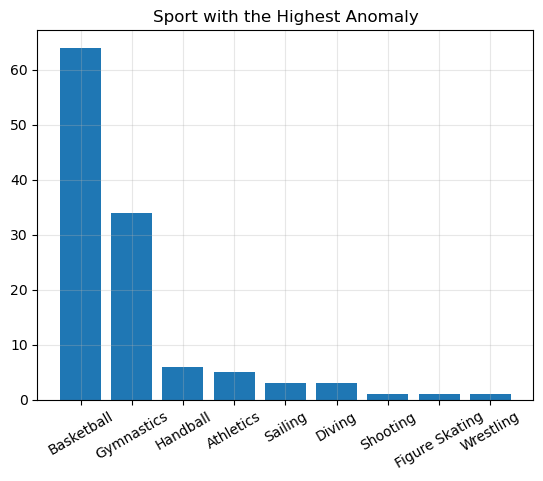

In [67]:
plt.figure()
plt.bar(data_anomaly.Sport.value_counts().index,data_anomaly.Sport.value_counts())
plt.xticks(rotation=30)
plt.title("Sport with the Highest Anomaly")
plt.grid(True,alpha=0.3)
plt.show()

In [68]:
data_gym = data_anomaly[data_anomaly.Sport == "Gymnastics"]
data_gym

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
13741,Oana Mihaela Ban,F,18.0,139.0,36.0,Romania,ROU,2004,Summer,Athina,Gymnastics,Gymnastics Women's Team All-Around,Gold
21260,Bi Wenjing,F,14.0,142.0,35.0,China,CHN,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Uneven Bars,Silver
23763,Loredana Boboc,F,16.0,139.0,32.0,Romania,ROU,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,Gold
47452,Laura Cutina,F,15.0,143.0,36.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold
53751,Deng Linlin,F,16.0,144.0,34.0,China,CHN,2008,Summer,Beijing,Gymnastics,Gymnastics Women's Team All-Around,Gold
53759,Deng Linlin,F,20.0,144.0,34.0,China,CHN,2012,Summer,London,Gymnastics,Gymnastics Women's Balance Beam,Gold
69216,Mariya Yevgenyevna Filatova (-Kurbatova),F,14.0,136.0,30.0,Soviet Union,URS,1976,Summer,Montreal,Gymnastics,Gymnastics Women's Team All-Around,Gold
69222,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold
69225,Mariya Yevgenyevna Filatova (-Kurbatova),F,19.0,136.0,30.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Uneven Bars,Bronze
80497,Maxi Gnauck,F,15.0,148.0,33.0,East Germany,GDR,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Individual All-Around,Silver


In [70]:
data_basket = data_anomaly[data_anomaly.Sport == "Basketball"]
data_basket

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
8834,Franjo Arapovi,M,23.0,211.0,120.0,Yugoslavia,YUG,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Silver
8835,Franjo Arapovi,M,27.0,211.0,120.0,Croatia,CRO,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Silver
21577,Oleksandr Mykhailovych Bielostienniy,M,21.0,214.0,117.0,Soviet Union,URS,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Bronze
21578,Oleksandr Mykhailovych Bielostienniy,M,29.0,214.0,117.0,Soviet Union,URS,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
25598,"Carlos Austin Boozer, Jr.",M,22.0,206.0,117.0,United States,USA,2004,Summer,Athina,Basketball,Basketball Men's Basketball,Bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270119,Rajko ii,M,21.0,210.0,110.0,Yugoslavia,YUG,1976,Summer,Montreal,Basketball,Basketball Men's Basketball,Silver
270120,Rajko ii,M,25.0,210.0,110.0,Yugoslavia,YUG,1980,Summer,Moskva,Basketball,Basketball Men's Basketball,Gold
270121,Rajko ii,M,29.0,210.0,110.0,Yugoslavia,YUG,1984,Summer,Los Angeles,Basketball,Basketball Men's Basketball,Bronze
270740,Eurelijus ukauskas,M,22.0,218.0,115.0,Lithuania,LTU,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


In [72]:
data_time = data.copy()
unique_years = data_time.Year.unique()
unique_years

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [74]:
sorted_array_years = np.sort(unique_years)
sorted_array_years

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

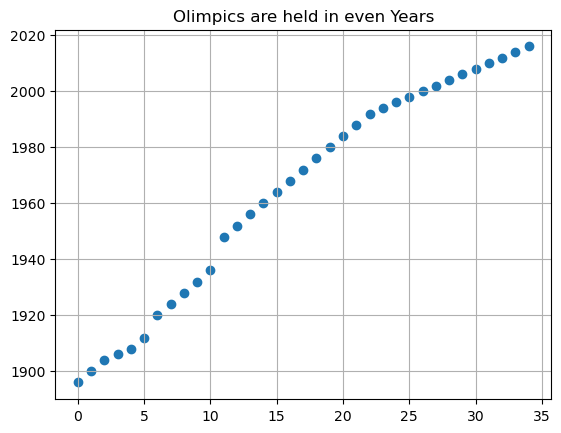

In [75]:
plt.figure()
plt.scatter(range(len(sorted_array_years)),sorted_array_years)
plt.grid(True)
plt.title("Olimpics are held in even Years")
plt.show()